In [172]:
#importo las librerias que necesitaré para la realización del proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [173]:
# cargo el dataset con pandas
data=pd.read_csv('/datasets/games.csv',sep=',')

In [174]:
#Visualizo y hago un diagnóstico inicial de la información del dataset
# Exploración inicial
print("Columnas del dataset:")
print(data.columns.tolist())

Columnas del dataset:
['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating']


In [175]:
print("\nPrimeras 5 filas:")
print(data.head())


Primeras 5 filas:
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [176]:
print("\nInformación del dataset:")
print(data.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


# LIMPIEZA DE DATOS

In [177]:

#El primer paso es pasar todos los nombres de las columnas a minúscula para hacer más fácil las referencias a los nombres más adelante en el análisis
data.columns=data.columns.str.lower()
print(data.columns.tolist())

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


In [178]:
#Hay que cambiar el tipo de dato de la columna year_of_Release
data['year_of_release']= data['year_of_release'].astype('Int64')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB
None


In [179]:
#Analizamos cuantos nombres de juegos hay duplicados
conteo_nombres = data['name'].value_counts()
print("Nombres que aparecen más de una vez:")
print(conteo_nombres[conteo_nombres > 1])

Nombres que aparecen más de una vez:
Need for Speed: Most Wanted        12
LEGO Marvel Super Heroes            9
Madden NFL 07                       9
FIFA 14                             9
Ratatouille                         9
                                   ..
Dinotopia: The Sunstone Odyssey     2
Syberia II                          2
Rune Factory: Tides of Destiny      2
NASCAR: Dirt to Daytona             2
Family Fortunes                     2
Name: name, Length: 2805, dtype: int64


In [180]:
#vemos que las filas de los nombres duplicados para analizar si todas son duplicadas o pertenecen a diferentes plataformas
filas_duplicadas = data[data['name'].duplicated(keep=False)]
print(f"Total de filas con nombres duplicados: {len(filas_duplicadas)}")
print(filas_duplicadas.head(20))  # Mostrar las primeras 10

Total de filas con nombres duplicados: 7961
                              name platform  year_of_release     genre  \
1                Super Mario Bros.      NES             1985  Platform   
5                           Tetris       GB             1989    Puzzle   
16              Grand Theft Auto V      PS3             2013    Action   
17   Grand Theft Auto: San Andreas      PS2             2004    Action   
18               Super Mario World     SNES             1990  Platform   
22             Super Mario Bros. 3      NES             1988  Platform   
23              Grand Theft Auto V     X360             2013    Action   
24     Grand Theft Auto: Vice City      PS2             2002    Action   
29  Call of Duty: Modern Warfare 3     X360             2011   Shooter   
31       Call of Duty: Black Ops 3      PS4             2015   Shooter   
32         Call of Duty: Black Ops     X360             2010   Shooter   
34      Call of Duty: Black Ops II      PS3             2012   Shoot

In [181]:
#Hacemos tratamiento a los valores nulos en las columnas critic_score, user_score y rating
#primero sumamos o analizamos cuantos valores nulos tiene cada columna
print(data['critic_score'].isnull().sum())
print(data['user_score'].isnull().sum())
print(data['rating'].isnull().sum())

8578
6701
6766


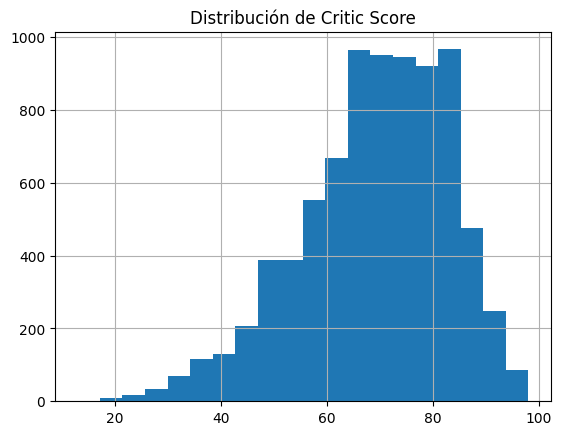

In [182]:
#para rellenar los vlaores nulos de critic_score para analizar la distribución de los datos
# Explora la distribución primero
data['critic_score'].hist(bins=20)
plt.title('Distribución de Critic Score')
plt.show()

In [183]:
#hallamos la media y mediana para saber la diferencia entre las métricas de tendencia central de los datos
print(data['critic_score'].mean())
print(data['critic_score'].median())

68.96767850559173
71.0


In [184]:
#Llenamos los valore nulos con la mediana de los datos que es lo más recomendable por la variabilidad de los datos
# La mediana es menos sensible a valores extremos
data['critic_score'].fillna(data['critic_score'].median(), inplace=True)
print(data['critic_score'].isnull().sum())

0


In [185]:
# Convertir 'tbd' y otros valores no numéricos a NaN
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

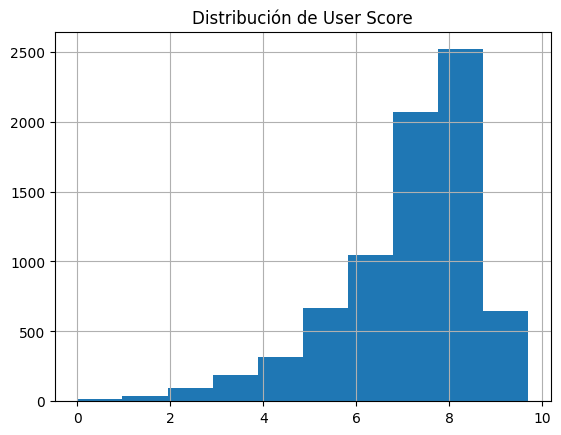

In [186]:
#para rellenar los vlaores nulos de user_score para analizar la distribución de los datos
# Explora la distribución primero
data['user_score'].hist(bins=10)
plt.title('Distribución de User Score')
plt.show()

In [187]:
#hallamos la media y mediana para saber la diferencia entre las métricas de tendencia central de los datos
print(data['user_score'].mean())
print(data['user_score'].median())

7.125046113306982
7.5


In [188]:
#Llenamos los valore nulos con la mediana de los datos que es lo más recomendable por la variabilidad de los datos
# La mediana es menos sensible a valores extremos
data['user_score'].fillna(data['user_score'].median(), inplace=True)
print(data['user_score'].isnull().sum())

0


In [189]:
# Ver qué valores únicos tiene rating
print("Valores únicos en rating:")
print(data['rating'].value_counts())

Valores únicos en rating:
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64


In [190]:
# Verificar si hay valores 'tbd' en la columna rating
print("¿Hay valores 'tbd' en rating?")
print('tbd' in data['rating'].values)

¿Hay valores 'tbd' en rating?
False


In [191]:
# Crear una categoría para valores desconocidos
data['rating'].fillna('Unknown', inplace=True)
print(data['rating'].isnull().sum())

0


In [192]:
#verificamos que los score y rating hayan quedado sin valores nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [193]:
# Revisa la cantidad de nulos en cada columna
print("Nulos en nombre:", data['name'].isnull().sum())
print("Nulos en género:", data['genre'].isnull().sum())
print("Total de registros:", len(data))

# Calcula el porcentaje de nulos
print("Porcentaje nulos nombre:", (data['name'].isnull().sum() / len(data)) * 100)
print("Porcentaje nulos género:", (data['genre'].isnull().sum() / len(data)) * 100)

Nulos en nombre: 2
Nulos en género: 2
Total de registros: 16715
Porcentaje nulos nombre: 0.011965300628178284
Porcentaje nulos género: 0.011965300628178284


In [194]:
#Creamos una categoría de desconocido para los valores nulos en name y genre
# Crear una categoría para valores desconocidos
data['name'].fillna('Unknown', inplace=True)
data['genre'].fillna('Unknown', inplace=True)
print(data['name'].isnull().sum())
print(data['genre'].isnull().sum())

0
0


In [195]:
# Revisa la cantidad de nulos en la columna year
print("Nulos en año:", data['year_of_release'].isnull().sum())
print("Total de registros:", len(data))

# Calcula el porcentaje de nulos
print("Porcentaje nulos nombre:", (data['year_of_release'].isnull().sum() / len(data)) * 100)


Nulos en año: 269
Total de registros: 16715
Porcentaje nulos nombre: 1.609332934489979


In [196]:
# Crear una categoría 0 para años desconocidos
data['year_of_release'].fillna(0, inplace=True)
print(data['year_of_release'].isnull().sum())

0


In [197]:
#volvemos a verificar la info del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [198]:
#Calculamos ventas totales
columnas_ventas = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
data['total_sales'] = data[columnas_ventas].sum(axis=1)
print(data.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77          71.0         7.5  Unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00          71.0         7.5  Unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3     

# ANÁLISIS DE LOS DATOS

In [199]:
# Contar juegos por año
games_per_year = data.groupby('year_of_release').size()
print(games_per_year.head())

year_of_release
0       269
1980      9
1981     46
1982     36
1983     17
dtype: int64


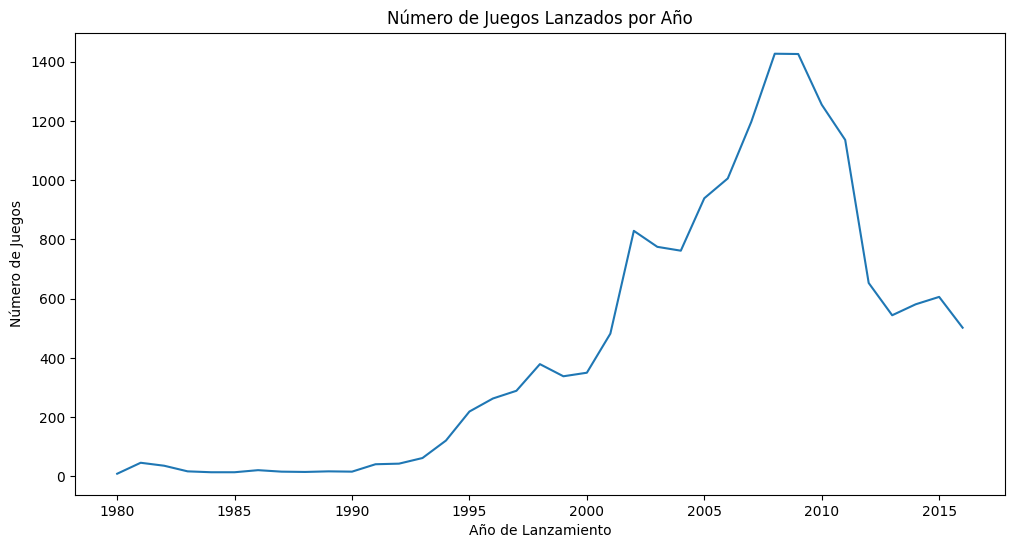

In [200]:
# Con seaborn para un gráfico más elegante
games_per_year_no_zero = games_per_year[games_per_year.index != 0]

plt.figure(figsize=(12, 6))
sns.lineplot(x=games_per_year_no_zero.index, y=games_per_year_no_zero.values)
plt.title('Número de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')
plt.show()

## El año de mayor auge fue el 2008 donde se lanzaron la mayor cantidad de juegos

In [201]:
# Ventas totales por plataforma
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print("Top 10 plataformas por ventas totales:")
print(platform_sales.head(10))

Top 10 plataformas por ventas totales:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


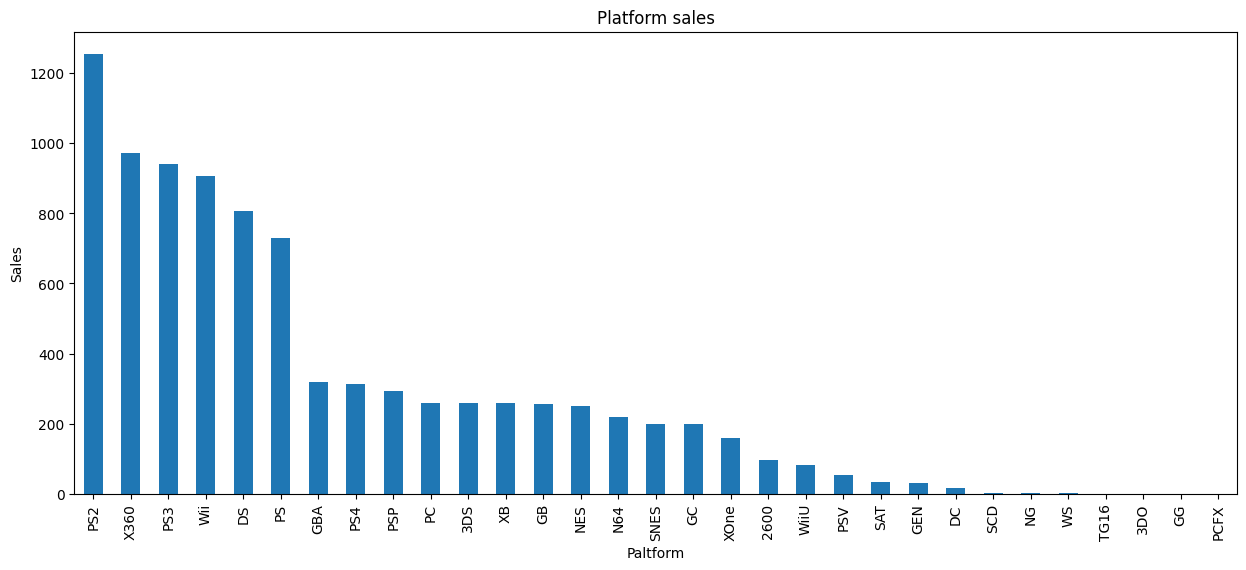

In [202]:
# Gráfico de barras (mejor para ver valores específicos)

plt.figure(figsize=(15, 6))
platform_sales.plot(kind='bar')
plt.title('Platform sales')
plt.xlabel('Paltform')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()



In [203]:
# Seleccionar las top 10 plataformas para el análisis
top_platforms = platform_sales.head(10).index.tolist()
print("Plataformas seleccionadas:", top_platforms)

Plataformas seleccionadas: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']


In [204]:
# Filtrar datos para las plataformas principales
data_top_platforms = data[data['platform'].isin(top_platforms)]

# Ventas por plataforma y año
platform_year_sales = data_top_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)

# Filtrar desde 1980 para evitar el año 0
platform_year_sales = platform_year_sales[platform_year_sales.index >= 1980]

<Figure size 1500x600 with 0 Axes>

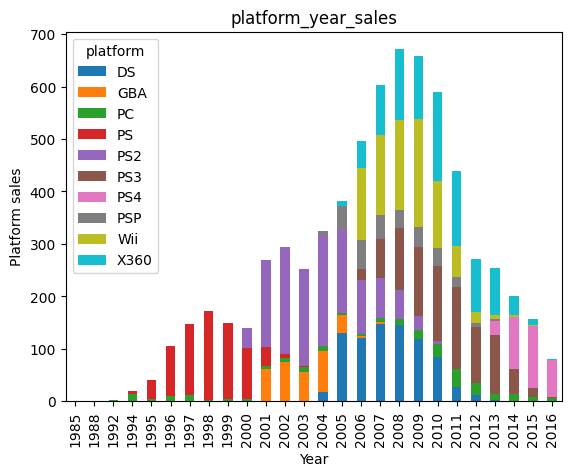

In [205]:

# Gráfico de barras (mejor para ver valores específicos)


plt.figure(figsize=(15, 6))
platform_year_sales.plot(kind='bar',stacked=True)
plt.title('platform_year_sales')
plt.xlabel('Year')
plt.ylabel('Platform sales')
plt.xticks(rotation=90)
plt.show()


## Las plataformas tienen un auge en ventas durante los primeros 5 años desde su lanzamiento

## Las plataformas más rentables a lo largo de los años han sido Wii y Xbox 360, aunque la que más se mantiene como líder es X360 mientras que Wii va perdiendo participación hasta el 2016.

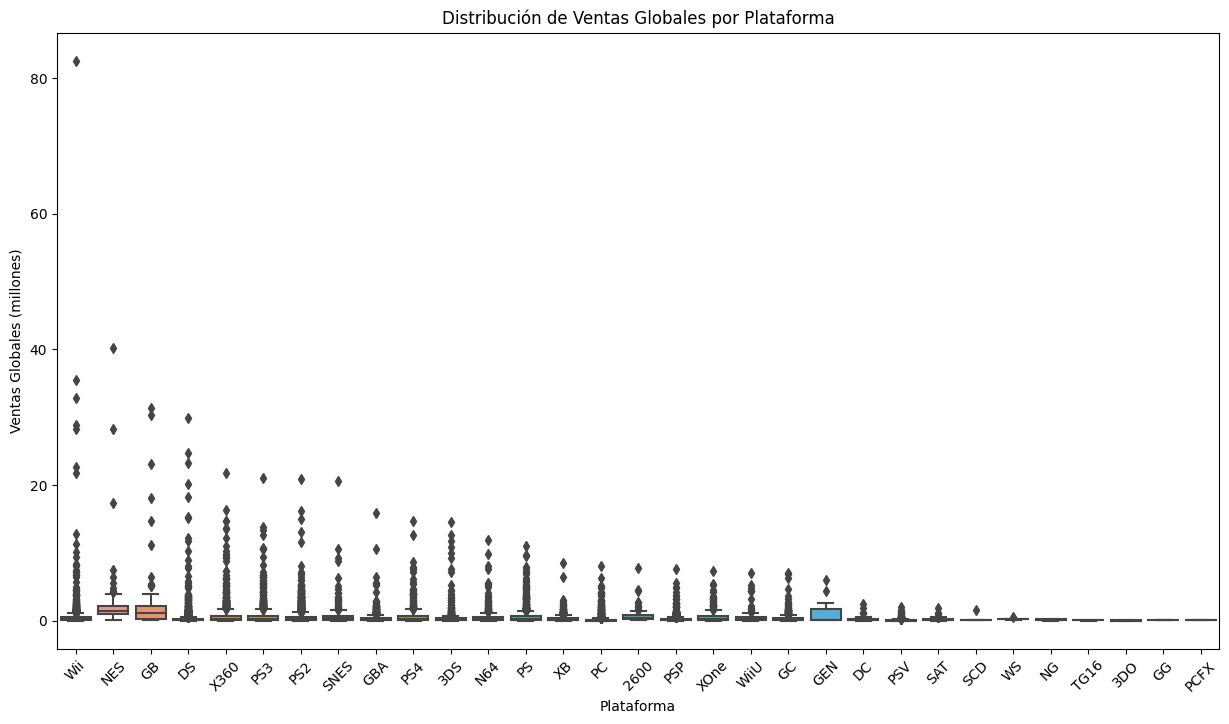

In [206]:
#Hago el boxplot

plt.figure(figsize=(15, 8))
sns.boxplot(data=data, x='platform', y='total_sales')
plt.title('Distribución de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xticks(rotation=45)
plt.show()

## Las ventas de la plataforma Wii son algo dispersas con puntos lejanos que llegan hasta un poco más de los 80 millones de dólares mientras aunque Xbox 360 es una de las plataformas con más ventas, los datos son más compactos

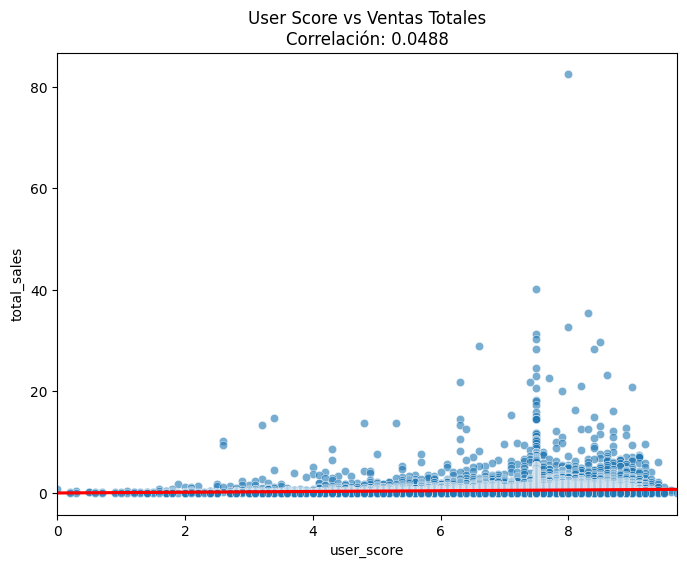

In [207]:
user_corr = data['user_score'].corr(data['total_sales'])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='user_score', y='total_sales', alpha=0.6)
sns.regplot(data=data, x='user_score', y='total_sales', scatter=False, color='red')
plt.title(f'User Score vs Ventas Totales\nCorrelación: {user_corr:.4f}')
plt.show()


## Las ventas se correlacionan positivamente con las puntuaciones de los usuarios lo que indicaria que los juegos con mayores puntuaciones son los que más ventas generan

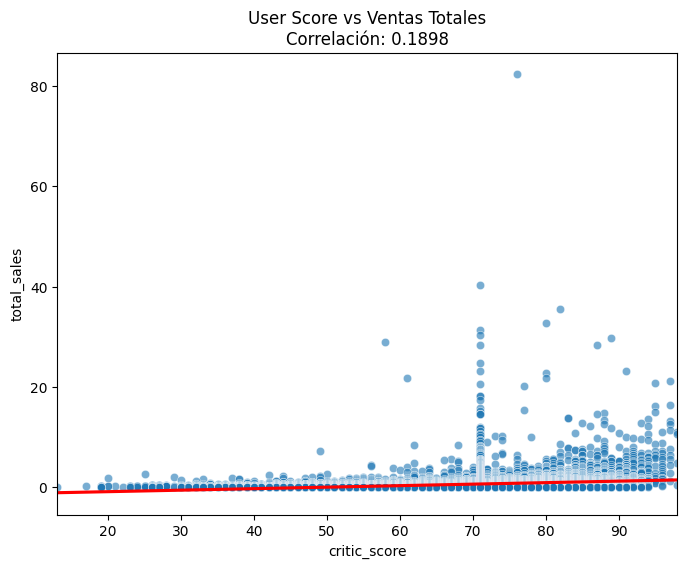

In [208]:
critic_corr = data['critic_score'].corr(data['total_sales'])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='critic_score', y='total_sales', alpha=0.6)
sns.regplot(data=data, x='critic_score', y='total_sales', scatter=False, color='red')
plt.title(f'User Score vs Ventas Totales\nCorrelación: {critic_corr:.4f}')
plt.show()

## La correlación entre las ventas totales y las reseñas de los profesionales es más fuerte lo que indica que entre más puntuación tienen los juegos por parte de los criticos, más ventas le representan a las plataformas y sus juegos.

In [209]:
# Identificar juegos que aparecen en múltiples plataformas
juegos_por_plataforma = data.groupby('name')['platform'].nunique()
juegos_multiplataforma = juegos_por_plataforma[juegos_por_plataforma > 1].index

# Filtrar el dataset para incluir solo estos juegos
data_multiplataforma = data[data['name'].isin(juegos_multiplataforma)]

print(f"Juegos únicos que aparecen en múltiples plataformas: {len(juegos_multiplataforma)}")
print(f"Total de registros de juegos multiplataforma: {len(data_multiplataforma)}")

Juegos únicos que aparecen en múltiples plataformas: 2805
Total de registros de juegos multiplataforma: 7959


In [210]:
# Calcular ventas totales por juego (sumando todas las plataformas)
ventas_por_juego = data_multiplataforma.groupby('name')['total_sales'].sum().sort_values(ascending=False)

print("Top 10 juegos multiplataforma por ventas totales:")
print(ventas_por_juego.head(10))

Top 10 juegos multiplataforma por ventas totales:
name
Grand Theft Auto V                56.58
Super Mario Bros.                 45.31
Tetris                            35.84
Call of Duty: Black Ops           30.82
Call of Duty: Modern Warfare 3    30.60
Call of Duty: Black Ops II        29.40
Call of Duty: Ghosts              27.39
Super Mario World                 26.09
Call of Duty: Black Ops 3         25.67
Call of Duty: Modern Warfare 2    24.97
Name: total_sales, dtype: float64


Analizando: Grand Theft Auto V


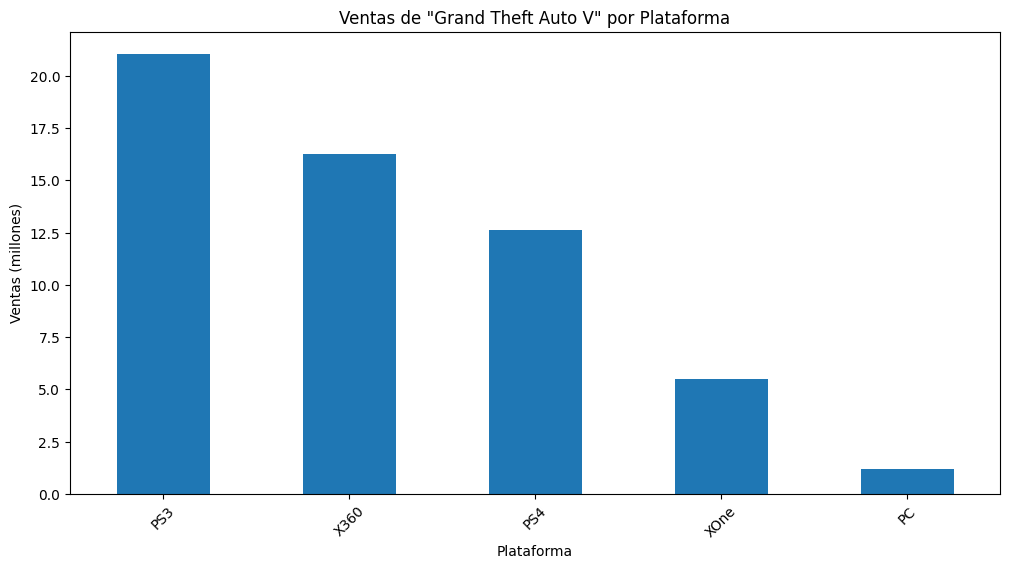

In [211]:
# Crear tabla pivote: juegos vs plataformas con ventas totales
tabla_comparativa = data_multiplataforma.pivot_table(
    index='name', 
    columns='platform', 
    values='total_sales', 
    fill_value=0
)

# Seleccionar el juego más exitoso para analizar
juego_top = ventas_por_juego.index[0]  # El juego con más ventas
print(f"Analizando: {juego_top}")

# Obtener las ventas de este juego por plataforma
ventas_juego = tabla_comparativa.loc[juego_top]
ventas_juego = ventas_juego[ventas_juego > 0].sort_values(ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
ventas_juego.plot(kind='bar')
plt.title(f'Ventas de "{juego_top}" por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45)
plt.show()

In [212]:
# Ver información completa del juego más exitoso
juego_info = data_multiplataforma[data_multiplataforma['name'] == juego_top]
print(f"Información de {juego_top}:")
print(juego_info[['name', 'platform', 'year_of_release', 'total_sales']].sort_values('total_sales', ascending=False))

Información de Grand Theft Auto V:
                    name platform  year_of_release  total_sales
16    Grand Theft Auto V      PS3             2013        21.05
23    Grand Theft Auto V     X360             2013        16.27
42    Grand Theft Auto V      PS4             2014        12.62
165   Grand Theft Auto V     XOne             2014         5.47
1730  Grand Theft Auto V       PC             2015         1.17


## El juego multiplataforma más vendido fue Grand Theft Auto V en la plataforma PS3 lanzado en el año 2013

In [213]:
genero=data.groupby(['genre'])['total_sales'].sum().sort_values(ascending= False)
print(genero.head(10))


genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Name: total_sales, dtype: float64


In [214]:
genero=data.groupby(['genre'])['total_sales'].sum().sort_values(ascending= True)
print(genero.head(10))

genre
Unknown           2.42
Strategy        174.23
Adventure       237.59
Puzzle          242.57
Simulation      389.97
Fighting        447.53
Racing          728.67
Misc            802.51
Platform        827.77
Role-Playing    934.56
Name: total_sales, dtype: float64


## Se puede concluir que los juegos con más ventas fueron los correspondientes a Acción, deportes y shooter(disparos), mientras que los de menor venta fueron estrategia, aventura y puzzle(armatodo)

# ANÁLISIS POR REGIÓN

In [215]:

ventas_na=data.groupby(['platform','year_of_release'])['na_sales'].sum().sort_values(ascending= False)
print(ventas_na.head())


platform  year_of_release
Wii       2009               114.55
X360      2010               107.38
Wii       2008                97.12
PS2       2004                96.78
          2002                96.54
Name: na_sales, dtype: float64


In [216]:
ventas_ue=data.groupby(['platform','year_of_release'])['eu_sales'].sum().sort_values(ascending= False)
print(ventas_ue.head())

platform  year_of_release
PS2       2002               65.27
          2003               61.20
Wii       2009               58.31
PS3       2011               56.24
PS2       2004               56.01
Name: eu_sales, dtype: float64


In [217]:
ventas_jp=data.groupby(['platform','year_of_release'])['jp_sales'].sum().sort_values(ascending= False)
print(ventas_jp.head())

platform  year_of_release
DS        2006               38.56
PS        1997               33.10
DS        2005               29.86
PS        1998               28.48
          1999               28.07
Name: jp_sales, dtype: float64


## Las plataformas Wii y X360 son las que más ventas han tenido haciendo que América gane la mayor cuota de mercado ya que alcanzaron las mayores ventas en los años 2009 y 2010. Por su parte, en Unión europea la plataforma estrella fue PS2 y en Japón DS.

In [218]:
genero_na=data.groupby(['genre'])['na_sales'].sum().sort_values(ascending= False)
print(genero_na.head())


genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64


In [219]:
genero_ue=data.groupby(['genre'])['eu_sales'].sum().sort_values(ascending= False)
print(genero_ue.head())

genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64


In [220]:
genero_jp=data.groupby(['genre'])['jp_sales'].sum().sort_values(ascending= False)
print(genero_jp.head())

genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


## Los géneros más vendidos corresponden a juegos de accion y deportes en América y Europa mientras que en Japón priman los juegos de roles o Role-Playing y luego los de acción y en tercer lugar deportes.

In [221]:
# Primero agrupar y sumar
rating_sales = data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
# Crear columna de total
rating_sales['total'] = rating_sales.sum(axis=1)
# Ordenar por total
rating_total = rating_sales.sort_values('total', ascending=False)
print(rating_total.head())

         na_sales  eu_sales  jp_sales  other_sales    total
rating                                                     
Unknown   1242.46    613.83    841.96       151.08  2849.33
E         1292.99    710.25    198.11       234.17  2435.52
T          759.75    427.03    151.40       155.17  1493.35
M          748.48    483.97     64.24       177.10  1473.79
E10+       353.32    188.52     40.20        73.56   655.60


## Además de la clasificación desconocida que obtiene las mayores ventas, la clasificación E que indica que es para todo el mundo obtienen las mayores ventas en todas las regiones, esto puede influir en las ventas en cada región ya que a medida que el juego es multiedad tiene más probabilidades de ser más vendido.

In [222]:
# Primero verifica los nombres de las columnas
print("Nombres de columnas actuales:")
print(data.columns.tolist())

Nombres de columnas actuales:
['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating', 'total_sales']


In [223]:
# Prueba las hipótesis
#Hipótyesis nula H0= Las clasificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
#Hipótesis alternativa= Las clasificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.


filtro_xone=data[data['platform'] == 'XOne']['user_score']a
filtro_pc=data[data['platform'] == 'PC']['user_score']


alpha = 0.05# tu código: establece un nivel crítico de significación estadística
equal_var = False
results=st.ttest_ind(filtro_xone,filtro_pc,equal_var=False)
# tu código: prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales

print('valor p:', results.pvalue) # tu código: imprime el valor p obtenido)

if results.pvalue < alpha:# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 4.964162612622159e-05
Rechazamos la hipótesis nula


In [224]:
# Prueba las hipótesis
#Hipótyesis nula H0= Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
#Hipótesis alternativa= Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


filtro_xone=data[data['genre'] == 'Action']['user_score']
filtro_pc=data[data['genre'] == 'Sports']['user_score']


alpha = 0.05# tu código: establece un nivel crítico de significación estadística
equal_var = False
results=st.ttest_ind(filtro_xone,filtro_pc,equal_var=False)

print('valor p:', results.pvalue) # tu código: imprime el valor p obtenido)

if results.pvalue < alpha:# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.7159128316394157
No podemos rechazar la hipótesis nula


## Según el análisis relaizado a lo largo del proyecto se concluye que las plataformas Wii y Xbox 360 son las que más ventas han generado específicamente en América. Además que hay una relación directa entre los puntajes tanto de los usuarios como de los profesionales con las ventas. Las plataformas pierden auge de ventas a los cinco años pero los años 2007-2008-2009 son los de mayor lanzamiento de videojuegos. También se analizaron las ventas totales y PS2, XBOX 360, PS3 y Wii Fueron los de mayores ventas. Los géneros más adquiridos fueron Acción y deportes principalmente en América y en Europa con mayor auge los Role _Playing en Japón.  Las clasificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.